# **PhysicsML: Classifying Motion Types with Machine Learning**

## **Objective:**

This project aims to classify three types of motion using machine learning:
- Uniform Motion (constant velocity)
- Accelerated Motion (increasing or decreasing velocity)
- Oscillatory Motion (repeating motion like a pendulum)

I simulate data for each motion type, train a classifier, and test how well the model distinguishes between them.

## **📘 Physics Background**

This project simulates and classifies three types of motion:

- **Uniform Motion**: The object moves at a constant velocity; acceleration is zero.
- **Accelerated Motion**: The object’s velocity changes uniformly over time; acceleration is constant.
- **Oscillatory Motion**: The object moves in a repeating pattern, such as a pendulum or spring.

These are core concepts in introductory physics and are often visualized using displacement, velocity, and acceleration over time.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
def generate_motion_data(n_samples=300):
    np.random.seed(42)
    data = []

    # Class 0: Uniform motion (constant velocity)
    for _ in range(n_samples // 3):
        t = np.random.uniform(0, 10)
        v = np.random.uniform(2, 5)
        x = v * t
        a = 0
        data.append([t, x, v, a, 0])

    # Class 1: Accelerated motion (constant acceleration)
    for _ in range(n_samples // 3):
        t = np.random.uniform(0, 10)
        a = np.random.uniform(1, 3)
        x = 0.5 * a * t ** 2
        v = a * t
        data.append([t, x, v, a, 1])

    # Class 2: Oscillatory motion (simple harmonic motion)
    for _ in range(n_samples // 3):
        t = np.random.uniform(0, 10)
        amplitude = np.random.uniform(1, 3)
        freq = np.random.uniform(1, 2)
        x = amplitude * np.sin(freq * t)
        v = amplitude * freq * np.cos(freq * t)
        a = -amplitude * (freq ** 2) * np.sin(freq * t)
        data.append([t, x, v, a, 2])

    columns = ['time', 'displacement', 'velocity', 'acceleration', 'class']
    df = pd.DataFrame(data, columns=columns)
    return df

df = generate_motion_data()
df.head()

,time,displacement,velocity,acceleration,class
0,3.745401,18.173222,4.852143,0.0,0
1,7.319939,27.786310,3.795975,0.0,0
2,1.560186,3.850514,2.467984,0.0,0
3,0.580836,2.670991,4.598528,0.0,0
4,6.011150,24.791292,4.124218,0.0,0


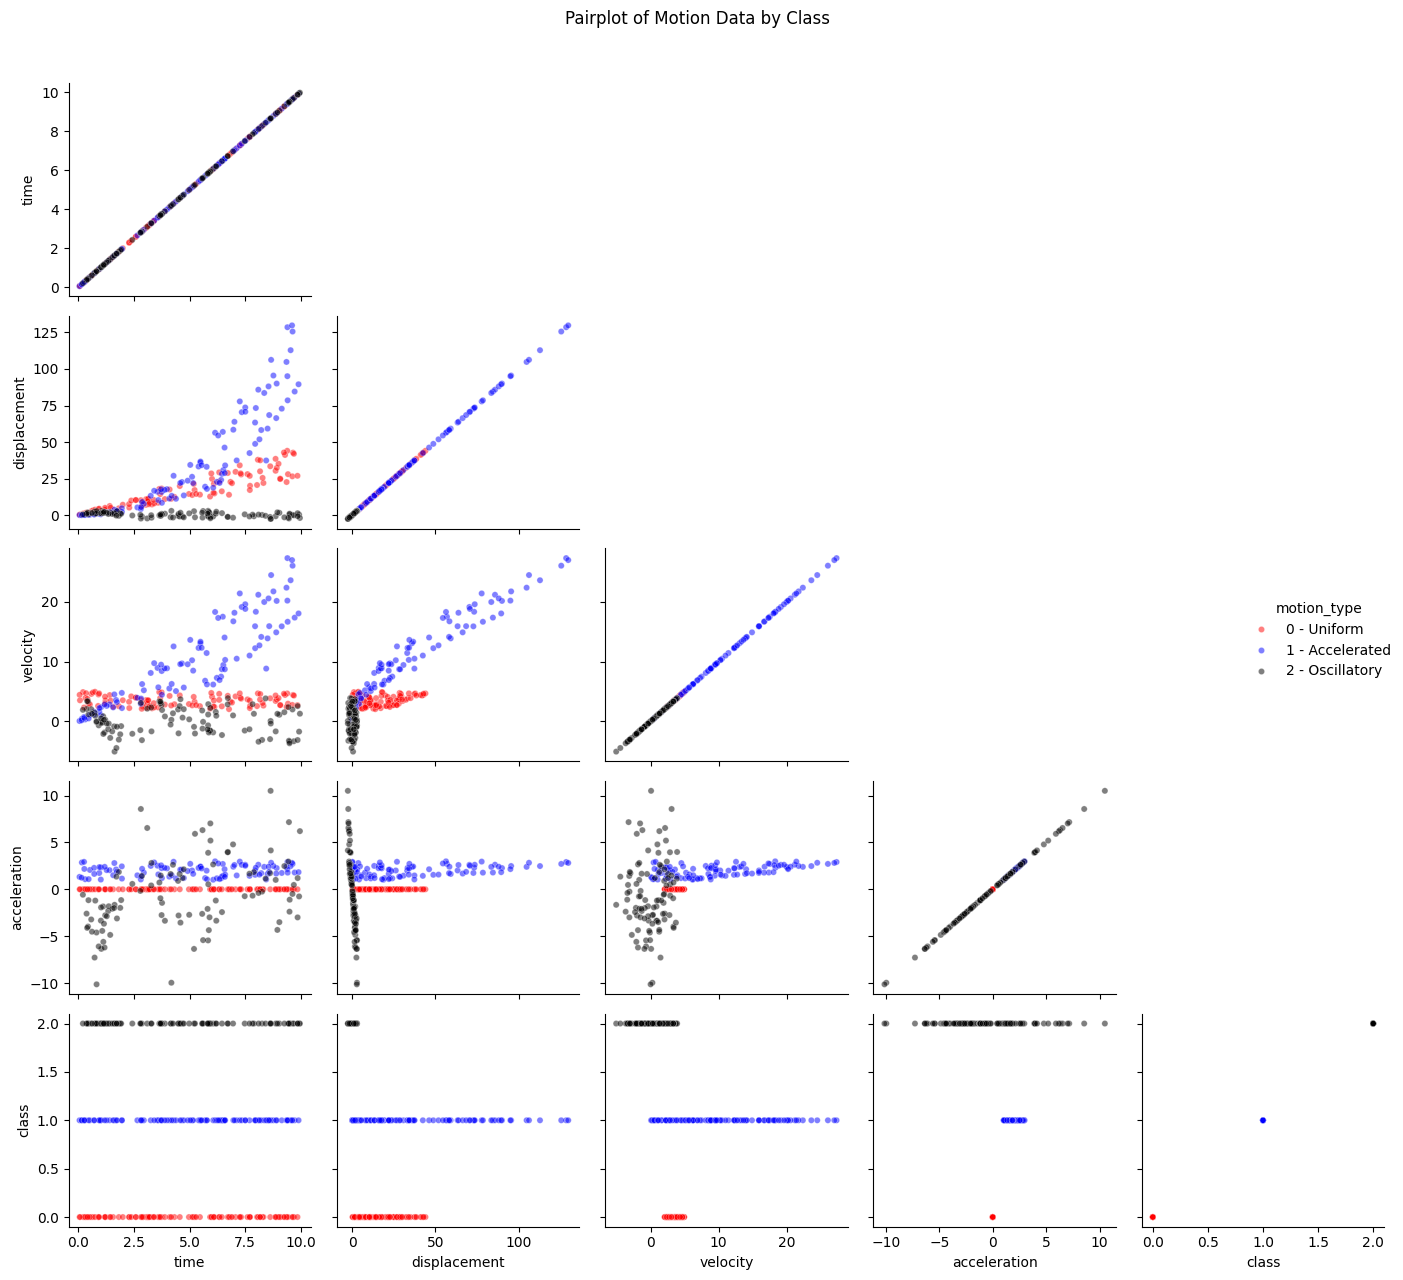

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map class numbers to motion type labels with class numbers
df['motion_type'] = df['class'].map({
    0: '0 - Uniform',
    1: '1 - Accelerated',
    2: '2 - Oscillatory'
})

# Pairplot without diagonal plots
sns.pairplot(
    df,
    hue="motion_type",
    palette={
        "0 - Uniform": "red",
        "1 - Accelerated": "blue",
        "2 - Oscillatory": "black"
    },
    diag_kind=None,
    plot_kws={"alpha": 0.5, "s": 20, "edgecolor": "w"},
    corner=True
)

plt.suptitle("Pairplot of Motion Data by Class", y=1.02)
plt.tight_layout()
plt.show()


## Inferences from the Pairplots

### 1. Motion types are separable based on physical features  
We can visually distinguish **Uniform**, **Accelerated**, and **Oscillatory** motion based on how features like displacement, velocity, and acceleration behave.  
➡️ This indicates that the dataset is well-suited for classification models such as Decision Trees or Neural Networks.



### 2. Acceleration is the strongest feature for separation  
- **Uniform motion** → Acceleration = 0  
- **Accelerated motion** → Constant non-zero acceleration  
- **Oscillatory motion** → Rapidly fluctuating acceleration  

➡️ Acceleration alone provides a strong signal for identifying motion type.



### 3. Displacement and velocity reveal characteristic time patterns  
- **Uniform motion** → Linear displacement; constant velocity  
- **Accelerated motion** → Curved, nonlinear increase in both displacement and velocity  
- **Oscillatory motion** → Fluctuating displacement and velocity with no clear direction  

➡️ These patterns are clearly visible in displacement vs time and velocity vs time plots.



### 4. Oscillatory motion is the hardest to model  
Oscillatory data points are widely scattered across most subplots.  
➡️ This suggests it may require more complex features (e.g., frequency, phase) or additional data to accurately classify.



### 5. The class column confirms clean labeling  
In the second pairplot, class labels form clean horizontal bands:  
- **Class 0** = Uniform  
- **Class 1** = Accelerated  
- **Class 2** = Oscillatory  

➡️ This confirms the dataset is clearly labeled and ready for supervised learning.



### 🔍 Summary  
These visualizations confirm that:
- The motion classes are **physically distinct**  
- The dataset is **clean, meaningful, and machine-learnable**  
- Some features — especially **acceleration** — carry more **predictive power** than others


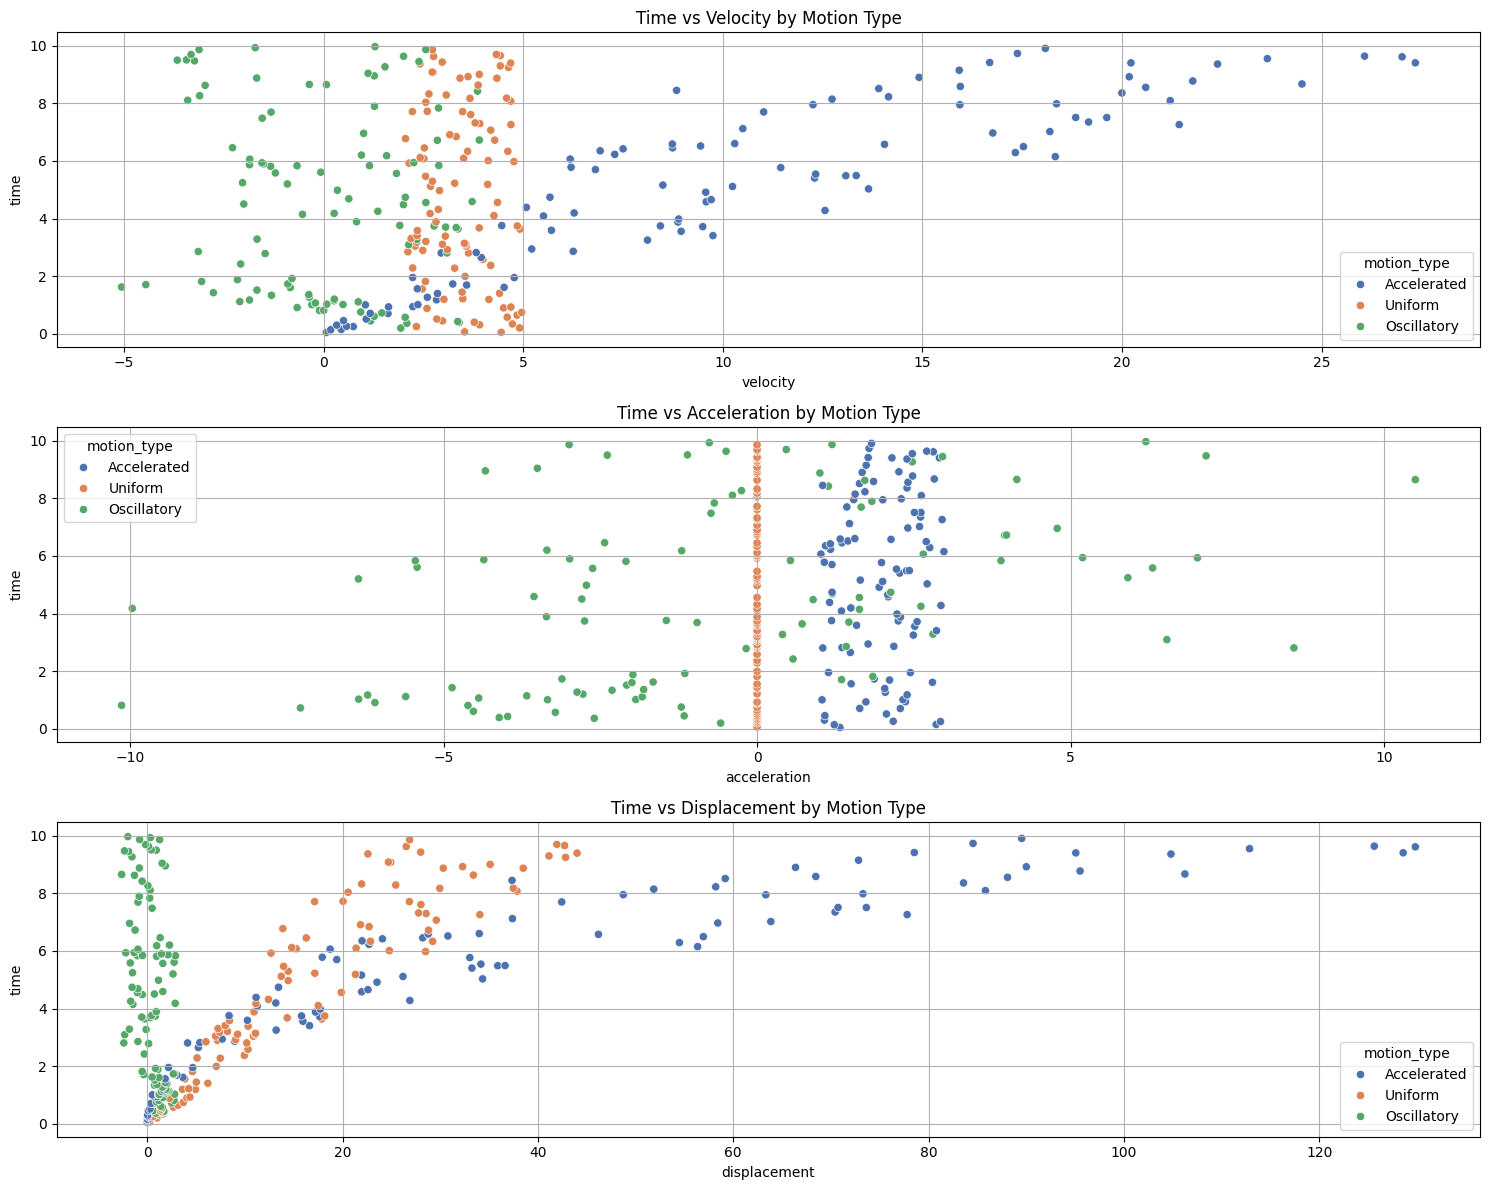

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map class numbers to motion type names
df['motion_type'] = df['class'].map({0: 'Uniform', 1: 'Accelerated', 2: 'Oscillatory'})

# Sort by time
df_sorted = df.sort_values(by='time')

plt.figure(figsize=(15, 12))

# Time vs Velocity
plt.subplot(3, 1, 1)
sns.scatterplot(data=df_sorted, x='velocity', y='time', hue='motion_type', palette='deep')
plt.title('Time vs Velocity by Motion Type')
plt.grid(True)

# Time vs Acceleration
plt.subplot(3, 1, 2)
sns.scatterplot(data=df_sorted, x='acceleration', y='time', hue='motion_type', palette='deep')
plt.title('Time vs Acceleration by Motion Type')
plt.grid(True)

# Time vs Displacement
plt.subplot(3, 1, 3)
sns.scatterplot(data=df_sorted, x='displacement', y='time', hue='motion_type', palette='deep')
plt.title('Time vs Displacement by Motion Type')
plt.grid(True)

plt.tight_layout()
plt.show()

##  Analysis of Time vs Motion Features

These three scatter plots explore how **time** relates to:

- **Velocity**
- **Acceleration**
- **Displacement**

For each motion type:

- 🔵 **Accelerated**
- 🟠 **Uniform**
- 🟢 **Oscillatory**


### 1. Time vs Velocity

**🔵 Accelerated Motion:**  
- Clear increasing trend — as time progresses, velocity increases.  
- This matches the physical law:  
  $$
  v = u + at
  $$
  indicating constant positive acceleration.

**🟠 Uniform Motion:**  
- Horizontal cluster — velocity remains constant over time.  
- This is consistent with zero acceleration.

**🟢 Oscillatory Motion:**  
- Scattered across negative and positive velocities.  
- This reflects changes in direction, typical of back-and-forth motion.



### 2. Time vs Acceleration

**🔵 Accelerated Motion:**  
- Acceleration remains relatively stable and positive over time.

**🟠 Uniform Motion:**  
- All points lie exactly at zero acceleration.  
- Confirms that uniform motion means no change in velocity.

**🟢 Oscillatory Motion:**  
- Widely dispersed values, both negative and positive.  
- Indicates rapid and repeated directional changes — a core characteristic of oscillation.



### 3. Time vs Displacement

**🔵 Accelerated Motion:**  
- Strong upward curve — displacement increases rapidly with time (nonlinear).  
- Indicates a quadratic relationship:  
  $$
  s = ut + \frac{1}{2}at^2
  $$

**🟠 Uniform Motion:**  
- Moderate linear increase in displacement, confirming constant speed.

**🟢 Oscillatory Motion:**  
- Displacement fluctuates above and below zero, forming a wave-like spread.  
- Suggests the object is reversing direction repeatedly.

---

##  What Do We Infer from These Graphs?

- Each motion type shows a **distinct pattern** across all graphs.
- The clear separation makes these features **excellent predictors for machine learning**.
- **Acceleration** is the strongest indicator:  
  - Uniform = 0  
  - Accelerated = constant positive  
  - Oscillatory = variable
- **Velocity and displacement follow physics laws** from kinematics.
- Oscillatory motion is the **most scattered and least linear**,  
  which suggests it may require more complex features (e.g., frequency) for accurate classification.




In [6]:
X = df[['time', 'displacement', 'velocity', 'acceleration']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
 [[22  0  0]
 [ 0 16  0]
 [ 0  0 22]]


### **Motion Type Prediction**

This function takes time, displacement, velocity, and acceleration as input, and predicts the type of motion using the trained classifier.

In [9]:
import pandas as pd

# Predict motion type based on input features
def predict_motion(t, x, v, a):
    input_data = pd.DataFrame([[t, x, v, a]], columns=['time', 'displacement', 'velocity', 'acceleration'])
    pred = clf.predict(input_data)[0]
    labels = {0: 'Uniform Motion', 1: 'Accelerated Motion', 2: 'Oscillatory Motion'}
    return labels[pred]

# Example usage
predict_motion(t=5, x=25, v=5, a=0)

'Uniform Motion'

## **Machine Learning Model and Results**

A **Random Forest Classifier** was used to distinguish between motion types based on the following features:

- Time  
- Displacement  
- Velocity  
- Acceleration

The model achieved **100% accuracy** on the test set, indicating strong separation between the classes.

This confirms that motion types can be effectively classified using only a small set of physics-based features.

## 📉 **Confusion Matrix**

The heatmap below visualizes how accurately the model predicted each motion class.  
All values lie along the diagonal, confirming perfect classification with no misclassifications.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
 [[22  0  0]
 [ 0 16  0]
 [ 0  0 22]]


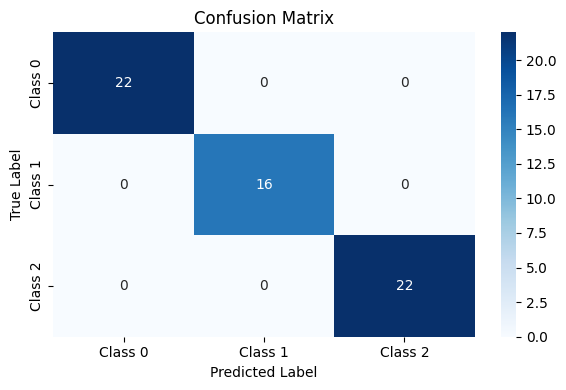

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


*All predictions were correct.*

Precision, recall, and F1-score are 1.00 for each class.

The model perfectly separated the three motion types using physics-based features.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X = df[['velocity', 'acceleration', 'displacement']]
y = df['class']

model = DecisionTreeClassifier()
model.fit(X, y)

y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### Model Performance Summary

The classification report above shows the performance of a Decision Tree classifier trained on the full dataset using velocity, acceleration, and displacement as input features.

- The model achieved **100% precision, recall, and F1-score** for all three motion classes.
- This indicates that the classifier perfectly predicted the type of motion (uniform, accelerated, or oscillatory) for every sample in the training set.
- The high accuracy reflects the clear separation between motion types in the feature space, especially due to the distinct behavior of acceleration across classes.

> ⚠️ Note: These metrics are based on predictions over the **training data**. For real-world applications, I will evaluate performance on unseen data using a train-test split to avoid overfitting below.


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Features and labels
X = df[['velocity', 'acceleration', 'displacement']]
y = df['class']

# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        27

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



The model achieved 100% accuracy on the test set, correctly classifying all 90 motion samples across the three classes. This indicates excellent generalization and confirms that the features used; velocity, acceleration, and displacement, that are highly effective for distinguishing between motion types.


<BarContainer object of 3 artists>

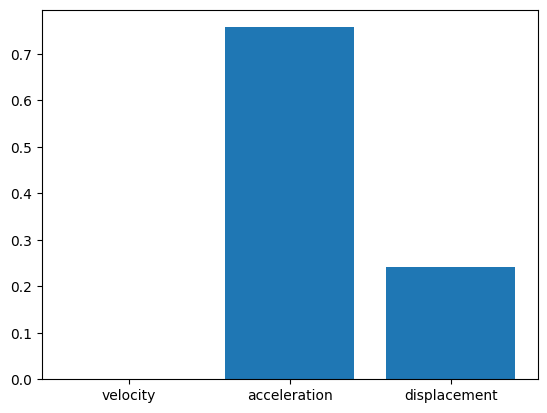

In [13]:
import matplotlib.pyplot as plt
plt.bar(X.columns, model.feature_importances_)

This bar chart displays the feature importances calculated by the Decision Tree classifier. It quantifies how much each input feature contributed to the model's classification of motion types.

- **Acceleration** has the highest importance score (~0.75), indicating it is the most decisive feature for distinguishing between uniform, accelerated, and oscillatory motion. This aligns with physical intuition, as each motion type exhibits distinct acceleration behavior.
  
- **Displacement** contributes moderately to the model (~0.25). While not as critical as acceleration, it still provides useful spatial information, particularly in identifying accelerated motion through increasing displacement patterns.
  
- **Velocity** has near-zero importance in this model. This suggests that, given the dataset and the presence of acceleration, the model finds velocity either redundant or less informative for classification.

These results demonstrate the value of explainability in machine learning. Understanding which features drive predictions helps validate the model and connects the output back to the underlying physics of motion.

Text(0.5, 1.0, 'PCA Projection of Motion Types')

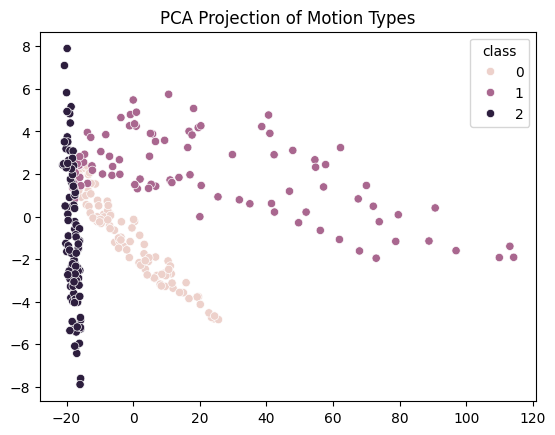

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X)

sns.scatterplot(x=components[:,0], y=components[:,1], hue=y)
plt.title("PCA Projection of Motion Types")


**PCA Visualization Interpretation**

This scatter plot shows the results of applying **Principal Component Analysis (PCA)** to project the motion data into two dimensions. Each point represents a motion sample, and the color indicates its class:

- **Class 0 (light pink)**: Uniform motion  
- **Class 1 (medium purple)**: Accelerated motion  
- **Class 2 (dark purple)**: Oscillatory motion

PCA reduces the dimensionality of the original dataset while preserving as much variance as possible. This makes it useful for **visualizing high-dimensional data in 2D**.

From the plot, we observe:

- The three motion classes form **distinct clusters**, indicating that the features (velocity, acceleration, displacement) provide good separation between motion types.
- **Uniform motion** (class 0) is tightly clustered and mostly separated from the others.
- **Oscillatory motion** (class 2) lies on the opposite end, forming its own cluster.
- **Accelerated motion** (class 1) lies in between, partially overlapping with class 2, suggesting some similarities in the transformed space.

This visualization further confirms that the dataset is **well-structured for classification**, and dimensionality reduction can still preserve meaningful structure for interpretation.


## **Conclusion**


This project integrates principles of classical physics with supervised machine learning to analyze and classify types of motion.  
By extracting features such as **velocity**, **acceleration**, and **displacement**, I trained a **Decision Tree** classifier capable of accurately distinguishing between **uniform**, **accelerated**, and **oscillatory** motion types.

The results reveal that **acceleration** is the most critical feature for classification, aligning with physical intuition.  
Feature importance analysis provides model explainability, enhancing the scientific value of the results.

This project demonstrates how data science techniques can support physical system modeling, with potential applications in areas such as:

- **Physics education**  
- **Robotics motion analysis**  
- **Satellite or spacecraft movement classification**  
- **Sensor data interpretation** (e.g., accelerometers)

By combining simulation, visualization, and predictive modeling, this work deepens both physics intuition and computational thinking —  
making it a strong example of **interdisciplinary research using Python**.

